In [1]:
import matplotlib.pyplot as plt
import numpy as np

h = 10

years = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
a = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]

In [2]:
A, C, B = (1, 4, 1)

F = [0]
F.extend([3.0 / h ** 2 * (a[i + 1] - 2 * a[i] + a[i - 1]) for i in range(1, len(a) - 1)])
F.append(0)

alpha = [0, -B / C]
beta = [0, F[0]/C]

for i in range(2, len(a) - 1):
    alpha.append(-B / (A * alpha[i - 1] + C))
    beta.append((F[i - 1] - A * beta[i - 1]) / (A * alpha[i - 1] + C))

In [3]:
x = []

for i in range(len(a) - 1):
    x.append(1.0 * (F[i] - A * beta[i]) / (C + A * alpha[i]))
    
x.append(0)

In [4]:
b = [(a[i] - a[i - 1]) / 10 + (2 * x[i] + x[i - 1]) / 3 * 10 for i in range(len(x))]
d = [(x[i] - x[i - 1]) / 30 for i in range(len(x))]

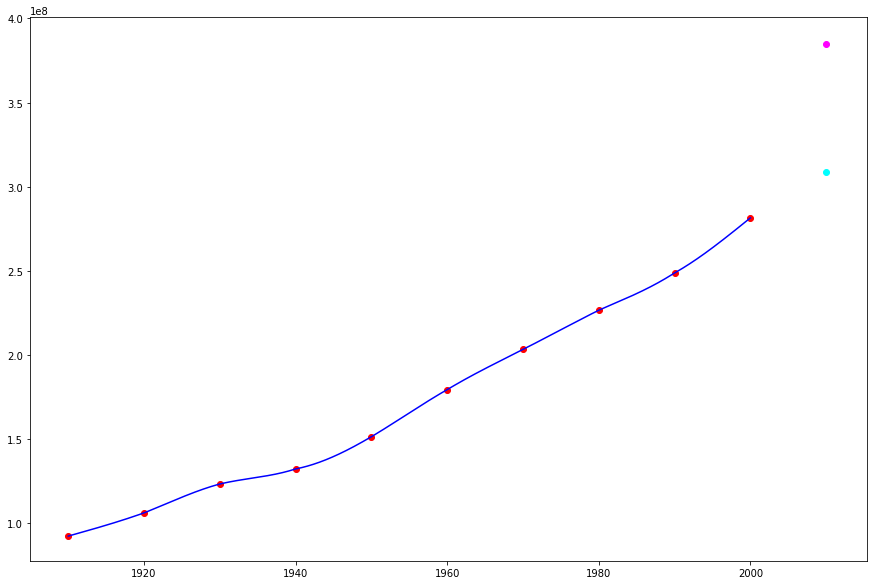

In [10]:
Y = []
for i in range(1, 10):
    X = np.linspace(1900 + i * 10, 1900 + i * 10 + 10, 1000)
    Y.extend(a[i] + b[i] * (X - years[i]) + x[i] * (X - years[i]) ** 2 + d[i] * (X - years[i]) ** 3)

    X = np.linspace(1910, 2000, len(Y))

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

plt.scatter(years, a, color='red')
plt.scatter(2010, answer, color='magenta')
plt.scatter(2010, 308745538, color='cyan')
plt.plot(X, Y, color='blue')

In [11]:
i = 8
X = 2010
answer = a[i] + b[i] * (X - years[i]) + x[i] * (X - years[i]) ** 2 + d[i] * (X - years[i]) ** 3
answer

384908185.77457714

In [12]:
def derivative(point, i, x, b, c, d):
    return b[i] + 2 * c[i] * (point - x[i]) + 3 * d[i] * (point - x[i]) ** 2

derivative(1910, 1, years, b, x, d)

1266369.1333333333